In [2]:
# libraries
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from ChunksProcessing.PyChronux import *

In [14]:
fname = "std_98khz_prot1_1.WAV"
# fname = "std_98khz_prot1_2.WAV"
# fname = "std_98khz_prot1_3.WAV"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/StdUltTests/"
fs_pcm = 98e3
os = 16
data_pcm, _ = sf.read(wd+fname, channels=1, samplerate=int(fs_pcm), format='RAW', endian='LITTLE', subtype='PCM_16', dtype=np.int16)
# data_pcm = data_pcm[int(2e5):int(2e5+2**16)]

In [7]:
len(data_pcm)

545491

In [15]:
data_pcm = data_pcm[:100000]

In [16]:
params = Params(tapers = [7, 11], Fs=fs_pcm, pad=0, fpass=[0, fs_pcm/2], trialave=0, err=[0, 0.05])
movingwin = [0.1, 0.01]
S, t, f = mtspecgramc(data_pcm.ravel(), movingwin, params)
S[:] = (S-np.min(S))/(np.max(S)-np.min(S))

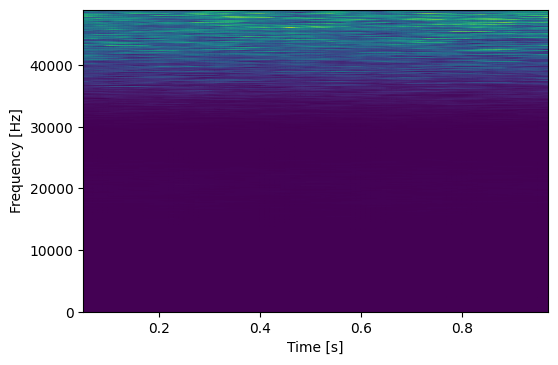

In [17]:
chunked_pcolormesh(t, f, S, v=[0, 1])

In [4]:
def spec(data_pcm, fs_pcm):
    params = Params(tapers = [7, 11], Fs=fs_pcm, pad=0, fpass=[0, fs_pcm/2], trialave=0, err=[0, 0.05])
    movingwin = [0.1, 0.01]
    S, t, f = mtspecgramc(data_pcm.ravel(), movingwin, params)
    S[:] = (S-np.min(S))/(np.max(S)-np.min(S))
    return t, f, S

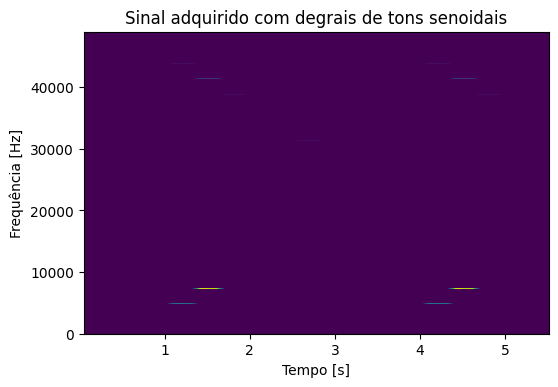

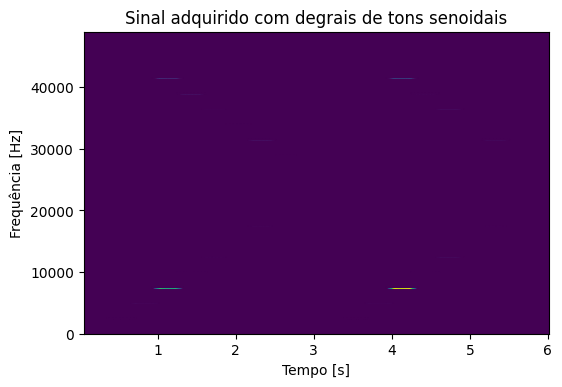

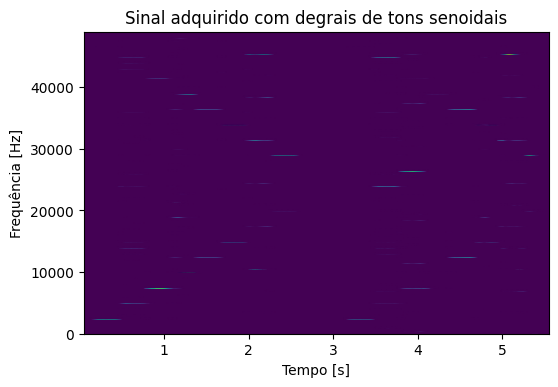

In [22]:
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/StdUltTests/"
fs_pcm = 98e3

fname = "std_98khz_prot1_1.WAV"
data_pcm, _ = sf.read(wd+fname, channels=1, samplerate=int(fs_pcm), format='RAW', endian='LITTLE', subtype='PCM_16', dtype=np.int16)
t, f, S = spec(data_pcm, fs_pcm)
chunked_pcolormesh(t, f, S, v=[0, 1], lang='pt', title='Sinal adquirido com degrais de tons senoidais')

fname = "std_98khz_prot1_2.WAV"
data_pcm, _ = sf.read(wd+fname, channels=1, samplerate=int(fs_pcm), format='RAW', endian='LITTLE', subtype='PCM_16', dtype=np.int16)
t, f, S = spec(data_pcm, fs_pcm)
chunked_pcolormesh(t, f, S, v=[0, 1], lang='pt', title='Sinal adquirido com degrais de tons senoidais')

fname = "std_98khz_prot1_3.WAV"
data_pcm, _ = sf.read(wd+fname, channels=1, samplerate=int(fs_pcm), format='RAW', endian='LITTLE', subtype='PCM_16', dtype=np.int16)
t, f, S = spec(data_pcm, fs_pcm)
chunked_pcolormesh(t, f, S, v=[0, 1], lang='pt', title='Sinal adquirido com degrais de tons senoidais')

In [8]:
fname = "std_98khz_prot1_1.WAV"
data_pcm, _ = sf.read(wd+fname, channels=1, samplerate=int(fs_pcm), format='RAW', endian='LITTLE', subtype='PCM_16', dtype=np.int16)
t, f, S = spec(data_pcm, fs_pcm)

In [7]:
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/StdUltTests/"
fs_pcm = 98e3

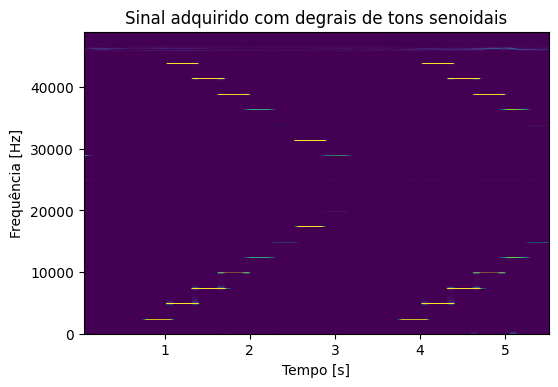

In [ ]:
chunked_pcolormesh(t, f, S, v=[0, .5e-2], lang='pt', title='Sinal adquirido com degraus de tons senoidais')

In [9]:
def chunked_pcolormesh(t, f, S, v=[1e-12,1e-4], lang='en', title=''):
    fig = plt.figure(dpi=100)
    ax = plt.axes()

    ax.pcolormesh(t, f, S, shading='gouraud', vmin=v[0], vmax=v[1])
    
    if lang=='en':
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [s]')
    elif lang=='pt':
        plt.ylabel('Frequência [Hz]')
        plt.xlabel('Tempo [s]')
    
    plt.title(title)
    
    plt.show()

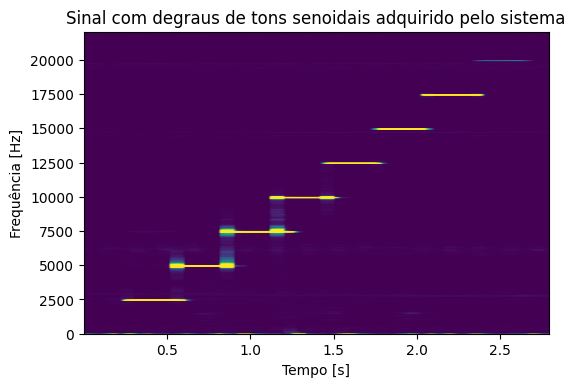

In [10]:
tt, ff, SS = np.copy(t[:]), np.copy(f[:]), np.copy(S[:])
ti, tf, fc = 0.5, 3.3, 22050
tt = tt[(tt>=ti) & (tt<=tf)]
ff = ff[ff<=fc]
SS = SS[f[:]<=fc, :][:, (t[:]>=ti) & (t[:]<=tf)]
chunked_pcolormesh(tt-ti, ff, 10*SS, v=[0, 1e-2], lang='pt', title='Sinal com degraus de tons senoidais adquirido pelo sistema')

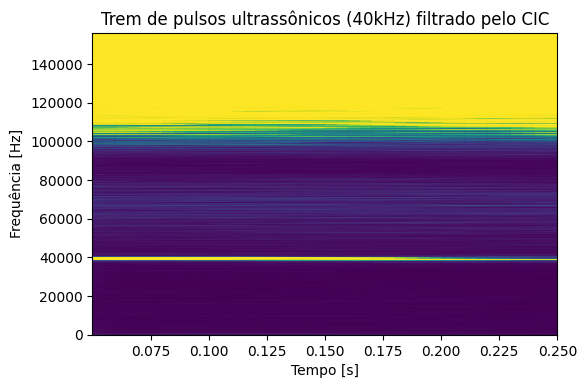

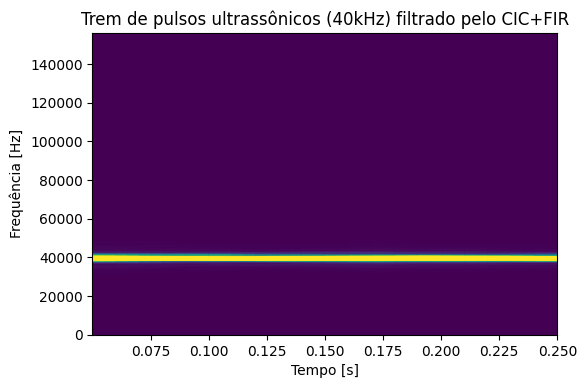

In [146]:
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/StdUltTests/"
fs_pcm = 312500

fname = "ult_cic_312500hz_prot1_2.WAV"
data_cic, _ = sf.read(wd+fname, channels=1, samplerate=int(fs_pcm), format='RAW', endian='BIG', subtype='PCM_16', dtype=np.int16)
t, f, S = spec(data_cic, fs_pcm)
chunked_pcolormesh(t, f, S, v=[0, 5e-2], lang='pt', title='Trem de pulsos ultrassônicos (40kHz) filtrado pelo CIC')

fname = "ult_fir_312500hz_prot1_2.WAV"
data_fir, _ = sf.read(wd+fname, channels=1, samplerate=int(fs_pcm), format='RAW', endian='LITTLE', subtype='PCM_16', dtype=np.int16)
t, f, S = spec(data_fir, fs_pcm)
chunked_pcolormesh(t, f, S, v=[0, 5e-2], lang='pt', title='Trem de pulsos ultrassônicos (40kHz) filtrado pelo CIC+FIR')